TP IA FINANCE — PARTIE 1 & PARTIE 2

📊 PORTEFEUILLE A (Conservative)
Moyenne mensuelle : 0.94%
Écart-type mensuel : 0.48%
Médiane : 1.00%
Rendement annualisé : 11.85%
Volatilité annualisée : 1.65%

📊 PORTEFEUILLE B (Agressif)
Moyenne mensuelle : 2.89%
Écart-type mensuel : 4.45%
Médiane : 4.70%
Rendement annualisé : 40.79%
Volatilité annualisée : 15.41%


/tmp/ipython-input-171099287.py:70: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([rendements_A, rendements_B], labels=["A","B"])


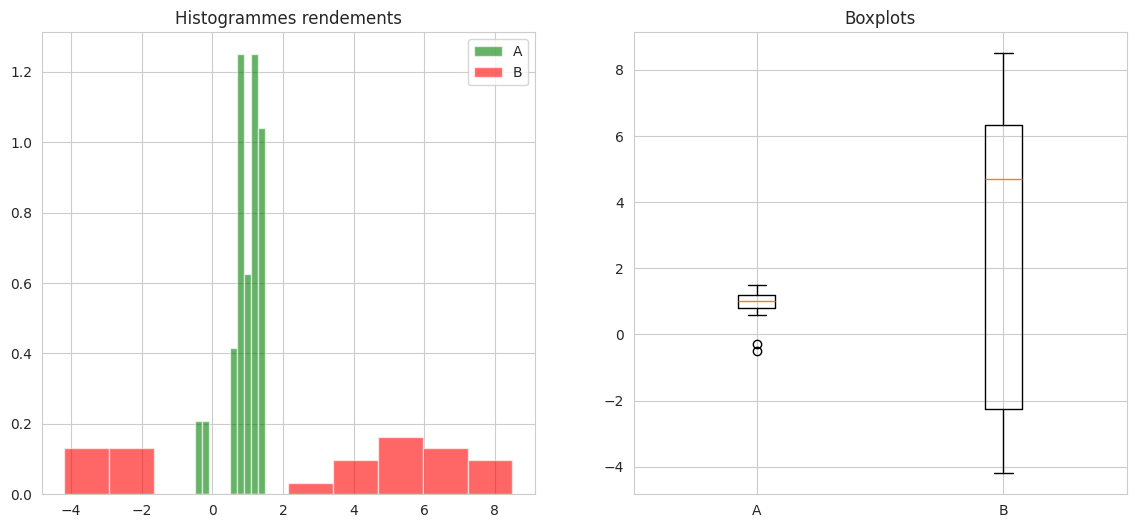


VaR 95% annuelle (€)
A : 751.0909896532436
B : -22232.430261230547

Test Shapiro-Wilk
A p-value : 0.0003325496638095976
B p-value : 0.001242967311174172

Ratio Sharpe
A : 5.353
B : 2.453

Bayes — Mise à jour séquentielle
Prior : 0.05
Après retard : 0.29629629629629634
Après découvert : 0.6459627329192548


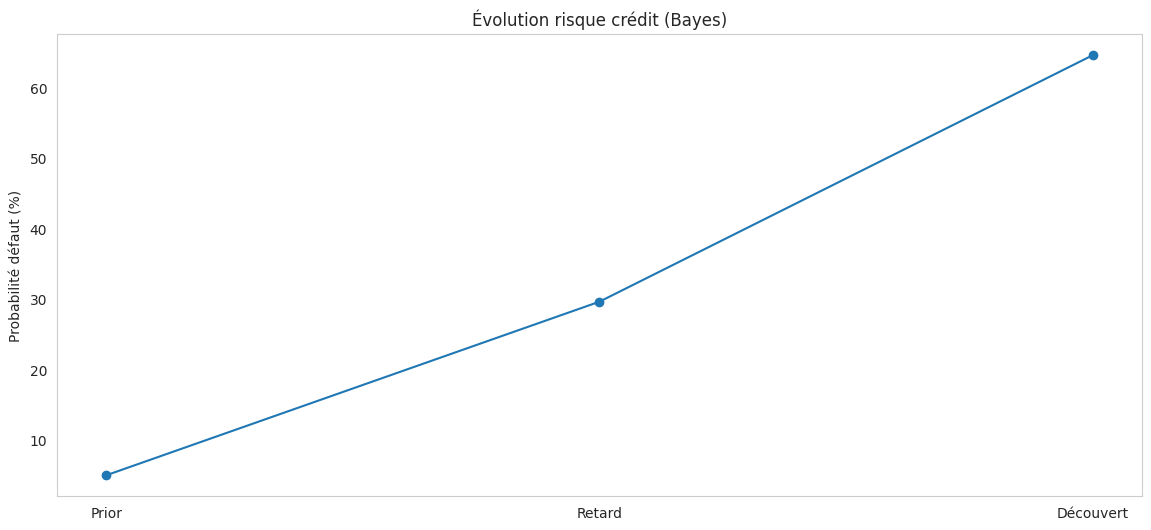


✅ FIN DU TP — CODE EXÉCUTÉ AVEC SUCCÈS


In [1]:
# ============================================================
# TP IA FINANCE — PARTIE 1 & PARTIE 2
# Statistiques, VaR, Sharpe & Théorème de Bayes
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14,6)

print("="*80)
print("TP IA FINANCE — PARTIE 1 & PARTIE 2")
print("="*80)

# ============================================================
# PARTIE 1 — STATISTIQUES & RISQUE
# ============================================================

rendements_A = np.array([
    1.2, 0.8, -0.5, 1.5, 0.9, 1.1, 0.7, 1.3, 1.0, 0.6, 1.4, 0.8,
    1.1, 0.9, -0.3, 1.2, 1.0, 1.5, 0.8, 1.3, 0.9, 1.1, 1.2, 1.0
])

rendements_B = np.array([
    4.5, -2.1, 6.2, -3.5, 5.8, 7.1, -1.8, 4.9, 3.2, -4.2, 8.5, -2.7,
    5.1, 6.8, -3.1, 7.3, 4.5, -2.9, 6.7, 5.3, -3.8, 7.9, 4.2, 5.5
])

capital = 500000
perte_max = 50000
rf = 3.0

def stats_portefeuille(r):
    mu = np.mean(r)
    sigma = np.std(r, ddof=1)
    mediane = np.median(r)
    rendement_annuel = ((1 + mu/100)**12 - 1) * 100
    vol_annuelle = sigma * np.sqrt(12)
    return mu, sigma, mediane, rendement_annuel, vol_annuelle

stats_A = stats_portefeuille(rendements_A)
stats_B = stats_portefeuille(rendements_B)

def afficher(nom, s):
    print(f"\n📊 {nom}")
    print(f"Moyenne mensuelle : {s[0]:.2f}%")
    print(f"Écart-type mensuel : {s[1]:.2f}%")
    print(f"Médiane : {s[2]:.2f}%")
    print(f"Rendement annualisé : {s[3]:.2f}%")
    print(f"Volatilité annualisée : {s[4]:.2f}%")

afficher("PORTEFEUILLE A (Conservative)", stats_A)
afficher("PORTEFEUILLE B (Agressif)", stats_B)

# ============================================================
# VISUALISATIONS
# ============================================================

fig, ax = plt.subplots(1,2)

ax[0].hist(rendements_A, bins=10, alpha=0.6, label="A", color="green", density=True)
ax[0].hist(rendements_B, bins=10, alpha=0.6, label="B", color="red", density=True)
ax[0].legend()
ax[0].set_title("Histogrammes rendements")

ax[1].boxplot([rendements_A, rendements_B], labels=["A","B"])
ax[1].set_title("Boxplots")

plt.show()

# ============================================================
# VaR 95%
# ============================================================

def var_param(mu, sigma, capital):
    z = -1.65
    var_pct = mu + z * sigma
    var_euro = capital * var_pct / 100
    return var_pct, var_euro

varA = var_param(stats_A[0], stats_A[1], capital)
varB = var_param(stats_B[0], stats_B[1], capital)

print("\nVaR 95% annuelle (€)")
print("A :", varA[1])
print("B :", varB[1])

print("\nTest Shapiro-Wilk")
print("A p-value :", stats.shapiro(rendements_A)[1])
print("B p-value :", stats.shapiro(rendements_B)[1])

# ============================================================
# Ratio de Sharpe
# ============================================================

sharpe_A = (stats_A[3] - rf) / stats_A[4]
sharpe_B = (stats_B[3] - rf) / stats_B[4]

print("\nRatio Sharpe")
print("A :", round(sharpe_A,3))
print("B :", round(sharpe_B,3))

# ============================================================
# PARTIE 2 — THÉORÈME DE BAYES
# ============================================================

def bayes_update(prior, p_e_pos, p_e_neg):
    return (p_e_pos * prior) / (p_e_pos * prior + p_e_neg * (1 - prior))

prior = 0.05
post_retard = bayes_update(prior, 0.80, 0.10)
post_decouvert = bayes_update(post_retard, 0.65, 0.15)

print("\nBayes — Mise à jour séquentielle")
print("Prior :", prior)
print("Après retard :", post_retard)
print("Après découvert :", post_decouvert)

# Graphique évolution
plt.plot([0,1,2], [prior*100, post_retard*100, post_decouvert*100], marker='o')
plt.xticks([0,1,2], ["Prior","Retard","Découvert"])
plt.ylabel("Probabilité défaut (%)")
plt.title("Évolution risque crédit (Bayes)")
plt.grid()
plt.show()

print("\n✅ FIN DU TP — CODE EXÉCUTÉ AVEC SUCCÈS")
